In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Condition monitoring/Classifcation/Classification_train_1.csv')
train

,ID,cycles,T24,T30,T50,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,labels
0,1,1,641.82,1589.70,1400.60,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0
1,1,2,642.15,1591.82,1403.14,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0
2,1,3,642.35,1587.99,1404.20,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0
3,1,4,642.35,1582.79,1401.87,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0
4,1,5,642.37,1582.85,1406.22,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,2
20627,100,197,643.54,1604.50,1433.58,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,2
20628,100,198,643.42,1602.46,1428.18,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,2


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Condition monitoring/Classifcation/Classification_test_1.csv')
#test_data[test_data['ID']==20].tail(20)

,ID,cycles,T24,T30,T50,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,labels
2415,20,165,643.14,1591.64,1413.17,2388.18,9061.42,47.75,521.33,2388.12,8147.80,8.4570,395,38.77,23.2679,2
2416,20,166,642.99,1591.99,1412.38,2388.17,9066.06,47.74,520.65,2388.19,8142.45,8.4764,393,38.72,23.1831,2
2417,20,167,643.19,1597.32,1417.47,2388.19,9068.29,47.68,521.28,2388.11,8140.51,8.4519,394,38.62,23.2662,2
2418,20,168,643.36,1599.19,1415.20,2388.18,9070.87,47.82,520.40,2388.18,8143.22,8.4651,394,38.50,23.2343,2
2419,20,169,642.55,1593.43,1423.55,2388.17,9062.94,47.82,520.56,2388.15,8139.38,8.5198,395,38.74,23.0718,2
2420,20,170,643.16,1599.33,1418.72,2388.09,9071.92,47.82,520.54,2388.14,8144.74,8.5027,394,38.71,23.2006,2
2421,20,171,642.95,1594.47,1425.58,2388.15,9069.08,47.87,520.56,2388.13,8143.27,8.4611,394,38.68,23.2134,2
2422,20,172,643.25,1597.93,1423.52,2388.13,9063.72,47.81,520.29,2388.23,8138.73,8.4624,393,38.51,23.2388,2
2423,20,173,643.61,1599.27,1421.49,2388.17,9058.28,47.66,521.00,2388.17,8142.99,8.4736,397,38.44,23.1382,2
2424,20,174,642.90,1595.25,1412.24,2388.13,9064.66,48.00,520.57,2388.14,8143.32,8.4933,395,38.55,23.1945,2


### Labels corresponding to each conditions
- Good Condition - 0
- Moderate Condition - 1
- Warning Condition - 2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Select the columns to be scaled
columns_to_scale = ['T24', 'T30', 'T50', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']

df = train
# Perform min-max scaling
df[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [ ]:
df

,ID,cycles,T24,T30,T50,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,labels
0,1,1,0.183735,0.406802,0.309757,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,0
1,1,2,0.283133,0.453019,0.352633,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,0
2,1,3,0.343373,0.369523,0.370527,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,0
3,1,4,0.343373,0.256159,0.331195,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,0
4,1,5,0.349398,0.257467,0.404625,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,2
20627,100,197,0.701807,0.729453,0.866475,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,2
20628,100,198,0.665663,0.684979,0.775321,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2
20629,100,199,0.608434,0.746021,0.747468,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,2


In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

0.8703658832081415

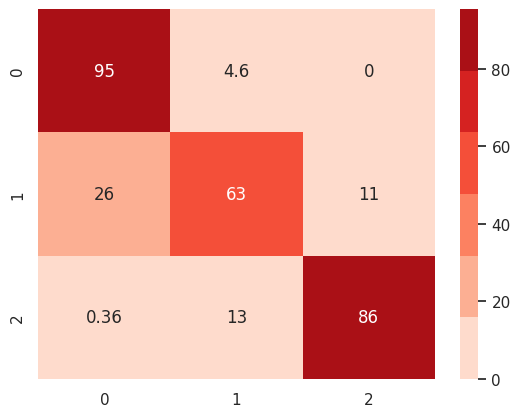

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_LR = LR.predict(X_test)
sns.set(font_scale=1.0) #edited as suggested
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_LR, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_LR)

## Decision Trees Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=7)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=100)

0.8710928034892174

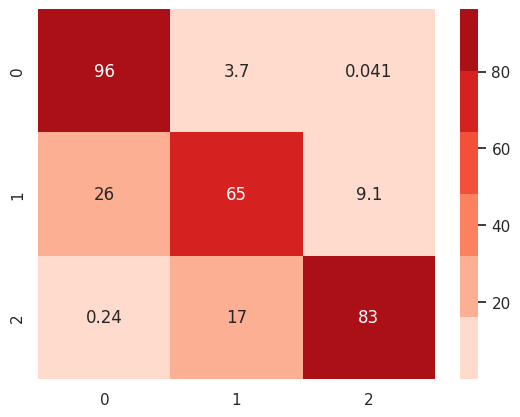

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_DT = DT.predict(X_test)
sns.set(font_scale=1.0) #edited as suggested
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DT, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_DT)

## XGBoost Classifier

In [ ]:
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier(learning_rate =0.1, n_estimators=500,max_depth=5,)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

0.9602616913011873

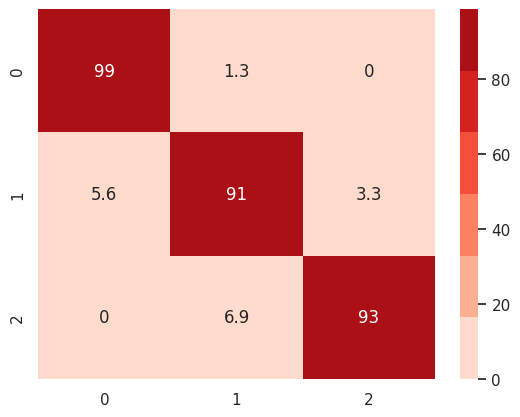

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_XGB = XGB.predict(X_test)
sns.set(font_scale=1.0) #edited as suggested
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_XGB, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_XGB)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

0.9064695905015749

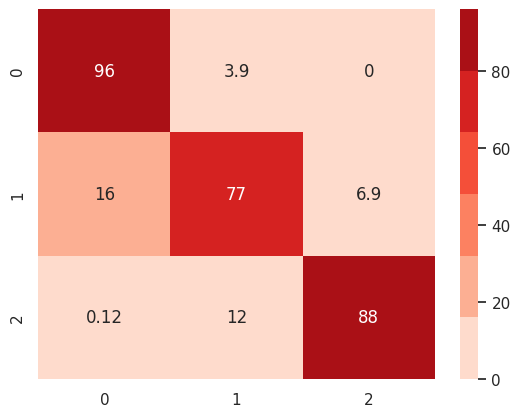

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_RF = RF.predict(X_test)
sns.set(font_scale=1.0) #edited as suggested
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

## Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

Accuracy: 0.9275502786527744


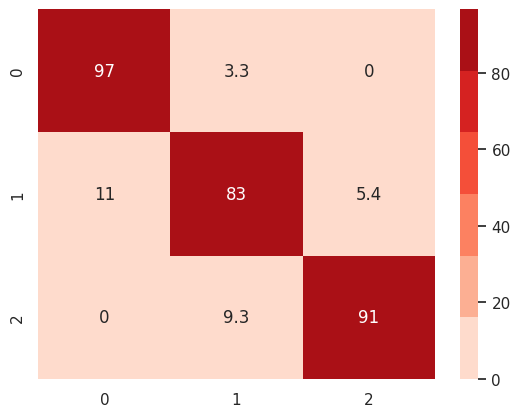

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

sns.set(font_scale=1.0) #edited as suggested
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)
plt.show()

In [ ]:
input_data = np.array([1,	4,	643.85,	1600.38,	1401.87,	2388.25,	9049.48,	47.13,
                       522.86,	2388.08,	8133.83, 8.3682,	392,	38.88,	23.3739]).reshape(1, -1)

# Use the model to make a prediction
prediction = XGB.predict(input_data)

# Print the prediction
print(f"The predicted class is: {prediction[0]}")

The predicted class is: 2


In [ ]:
train_1 = train[train['ID']==1]
train_1

,ID,cycles,T24,T30,T50,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,labels
0,1,1,0.183735,0.406802,0.309757,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,0
1,1,2,0.283133,0.453019,0.352633,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,0
2,1,3,0.343373,0.369523,0.370527,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,0
3,1,4,0.343373,0.256159,0.331195,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,0
4,1,5,0.349398,0.257467,0.404625,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,0.765060,0.683235,0.684166,0.621212,0.072602,0.684524,0.234542,0.514706,0.091599,0.753367,0.666667,0.286822,0.089202,2
188,1,189,0.894578,0.547853,0.772451,0.560606,0.102396,0.732143,0.189765,0.661765,0.090670,0.744132,0.583333,0.263566,0.301712,2
189,1,190,0.731928,0.614345,0.737677,0.590909,0.084582,0.880952,0.287846,0.691176,0.065229,0.759523,0.833333,0.271318,0.239299,2
190,1,191,0.641566,0.682799,0.734639,0.575758,0.094364,0.773810,0.187633,0.617647,0.075704,0.740669,0.500000,0.240310,0.324910,2


In [ ]:
def plot_fan_graph(train, id, input_data=input_data):
  if(id == input_data[0][0]):
    # Extract specific data points
    x = input_data[0][1]
    y = input_data[0][5]

    # Create a single subplot
    fig, ax = plt.subplots(figsize=(8, 6))  # Single plot

    # Scatter plot
    sns.scatterplot(x=[x], y=[y], s=150, ax=ax, label='Scatter Point')

    # Line plot
    train_1 = train[train['ID'] == id]
    sns.lineplot(x='cycles', y='Nf', data=train_1, color='green', ax=ax, label='Line Plot')

    # Set titles and labels
    ax.set_title('Physical Fan speed vs Cycles')
    ax.set_xlabel('Cycles')
    ax.set_ylabel('Physical Fan speed (rpm)')
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()
  else:
    print("Invalid input")


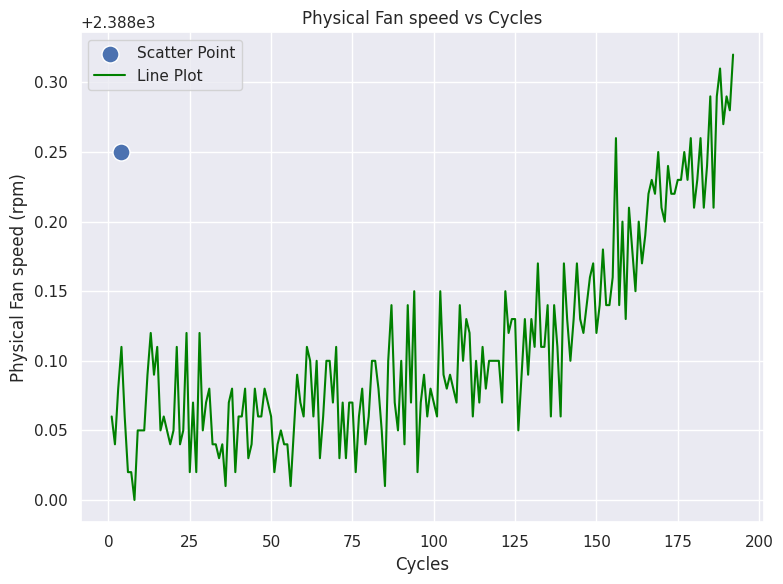

In [ ]:
plot_fan_graph(train, 1)